# (Ford GoBike System Data)
## by (Mohamed Bayoumy)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [4]:
df=pd.read_csv("fordgobike.csv")
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [5]:
df.dropna(df["member_gender"])

C:\Users\EAST-S~1\AppData\Local\Temp/ipykernel_12588/2760863954.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df.dropna(df["member_gender"])


TypeError: unhashable type: 'Series'

In [3]:
#display the shape of dataset
df.shape

(183412, 16)

In [4]:
#display the types of the columns
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
#display names of columns
list(df.columns.values)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

In [6]:
#diplay Statistical information for each column
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# convert the Start Time column to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

In [8]:
#extract month and day of week from Start Time to create new columns
df['month'] = df['start_time'].dt.month_name()
df['day_of_week'] = df['start_time'].dt.day_name()

In [9]:
#extract the age of member from dataset
df["age"]=2019-df["member_birth_year"]
df["age"]

0         35.0
1          NaN
2         47.0
3         30.0
4         45.0
          ... 
183407    23.0
183408    35.0
183409    29.0
183410    31.0
183411    30.0
Name: age, Length: 183412, dtype: float64

In [10]:
# create a new columns contains time with minutes
df["duration_min"]=df.duration_sec/60

In [11]:
# dropping unused columns
df.drop(["start_station_latitude","start_station_longitude","end_station_latitude","end_station_longitude","end_time","start_station_id","end_station_id","bike_id","member_birth_year"], axis = 1, inplace=True)
df.head(1)

,duration_sec,start_time,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,month,day_of_week,age,duration_min
0,52185,2019-02-28 17:32:10.145,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,February,Thursday,35.0,869.75


In [12]:
#Number of Duplicated rows
sum(df.duplicated())

0

In [13]:
#display the shape of dataset
df.shape

(183412, 11)

### What is the structure of your dataset?

> > My Dataset contains 183412 rows and 11 columns and it contains numerical columns like age and duration of the trip

>It also contains categorical columns like [member gender, start station name, end station name]



### What is/are the main feature(s) of interest in your dataset?

> The Main Features of Interest in my Dataset is:
  1. duration of the trip 
  2. Age of the member
  3. start station name
  4. end station name
  5. member gender


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
 Features in the dataset will help me
   1. day of the week
   2. user type
## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.
 
## Research Question 1 (Average Age of The Members)

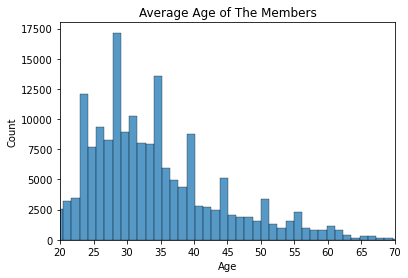

In [14]:
ticks=[20,25,30,35,40,45,50,55,60,65,70]
sns.histplot(x='age', data=df,bins=100)
plt.xlim(20,70)
plt.title("Average Age of The Members")
plt.xlabel("Age")
plt.xticks(ticks);

#### we can see that most of the users were between 25 and 40 years

## Research Question 2 (Average Time of The Trip)

In [15]:
# Transform the describe() to a scale of log10
np.log10(df['duration_min'].describe())

count    5.263428
mean     1.082832
std      1.475766
min      0.007179
25%      0.733732
50%      0.932812
75%      1.122762
max      3.153530
Name: duration_min, dtype: float64

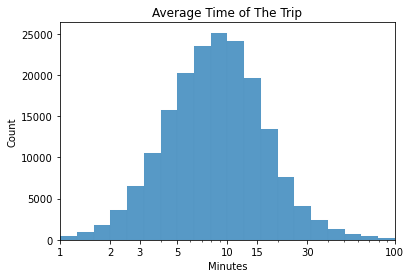

In [16]:
bins=10 ** np.arange(0, 3+0.1, 0.1)
sns.histplot(x='duration_min', data=df,bins=bins)
plt.xscale("log")
ticks = [ 1, 2, 3, 5, 10, 15,  30, 100]
labels = ['{}'.format(v) for v in ticks]
plt.title("Average Time of The Trip")
plt.xlabel("Minutes")
plt.xlim(1,100)
plt.xticks(ticks,labels);

#### Most of the Trips takes between 3 and 15 minutes

## Research Question 3 (Top 10 Start Stations)

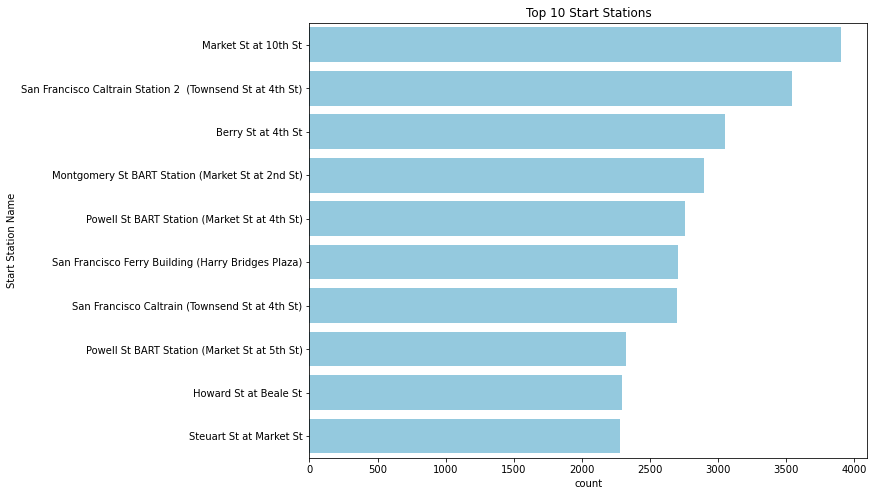

In [17]:
plt.subplots(figsize=(10, 8))
top_start_stations=df['start_station_name'].value_counts()[:10].index.tolist()
sns.countplot(y='start_station_name', data=df, order=top_start_stations,color='skyblue')
plt.title("Top 10 Start Stations")
plt.ylabel("Start Station Name");

#### Marke St at 10th St is the Most common start stations 

## Research Question 4 (Top 10 End Stations)

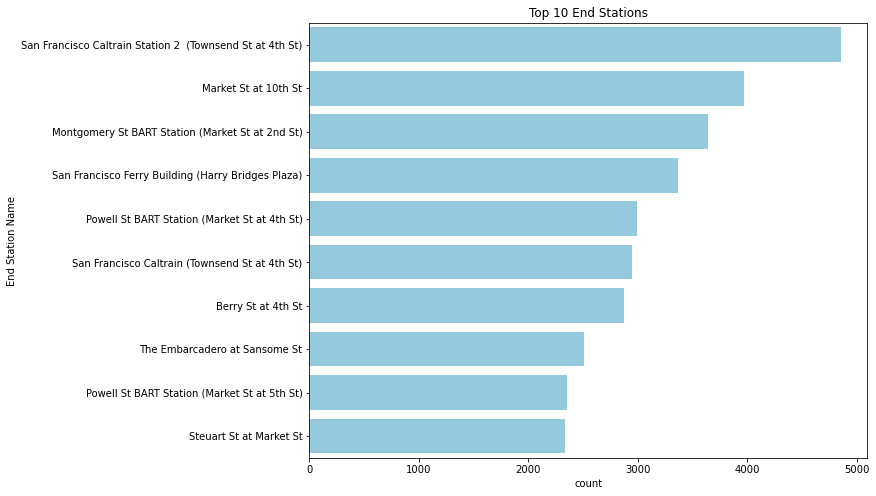

In [18]:
plt.subplots(figsize=(10, 8))
top_start_stations=df['end_station_name'].value_counts()[:10].index.tolist()
sns.countplot(y='end_station_name', data=df, order=top_start_stations,color='skyblue')
plt.title("Top 10 End Stations")
plt.ylabel("End Station Name");

#### San Francisco Caltrain Station2 is the most common end stations 


## Research Question 5 (The Most Common Start Days)

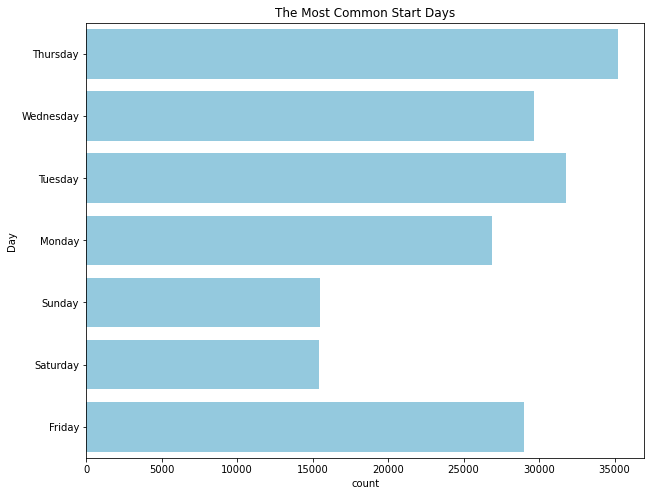

In [19]:
plt.subplots(figsize=(10, 8))
sns.countplot(y='day_of_week', data=df,color='skyblue',)
plt.title("The Most Common Start Days")
plt.ylabel("Day");

#### Thursday is the most common day to start the trip

## Research Question 6 (The Gender of The Memeber)

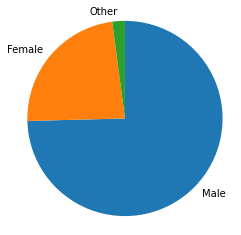

In [20]:
sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

#### Male is The Most Common Gender 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> i found that:
1. Most of the users were between 25 and 40 years
2. Most of the Trips takes between 3 and 15 minute
3. Male is The Most Common Gender 
4. Thursday is the most common day to start the trip
5. San Francisco Caltrain Station2 is the most common end stations 
6. Marke St at 10th St is the Most common start stations
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> i did some operations to help me like :
1. convert the Start Time column to datetime
2. extract month and day of week from Start Time to create new columns
3. extract the age of member from dataset
4. create a new columns contains time with minutes


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Research Question 7 (The Relation between Duration per Minute and Age)

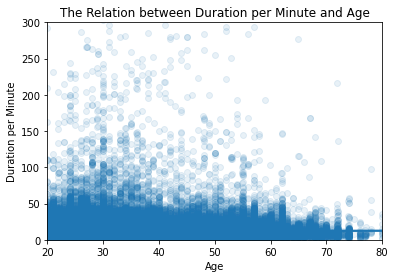

In [21]:
sns.regplot(x='age', y='duration_min', data=df, x_jitter=0.04, scatter_kws={'alpha':1/10} )
plt.title("The Relation between Duration per Minute and Age")
plt.xlabel("Age")
plt.ylabel("Duration per Minute")
plt.ylim(0,300)
plt.xlim(20,80);

#### The younger the age, The longer the trip

## Research Question 8 (The Relation between Days and Duration per Minute)

In [22]:
#Reorder the days
days_ordered = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['days_ordered'] = pd.Categorical(df['day_of_week'], categories=days_ordered, ordered=True)


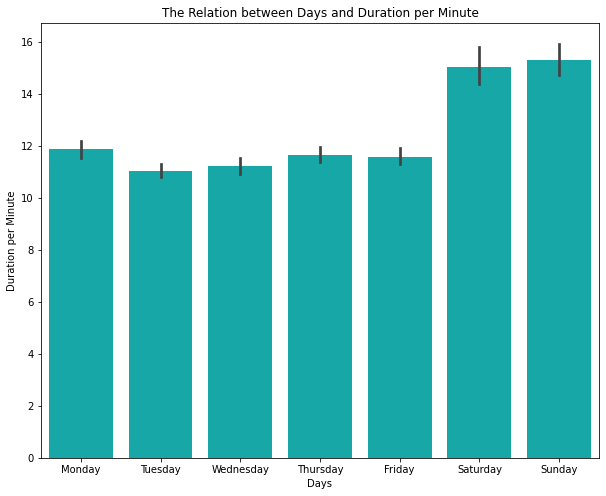

In [23]:
plt.subplots(figsize=(10, 8))
sns.barplot(x='days_ordered', y='duration_min', data=df,color='c')
plt.ylabel("Duration per Minute")
plt.xlabel("Days")
plt.title("The Relation between Days and Duration per Minute");


#### The longest trip was on Sunday and The shortest trip was on Tuesday
    

## Research Question 9 (The Relation between Gender and Duration per Minute)

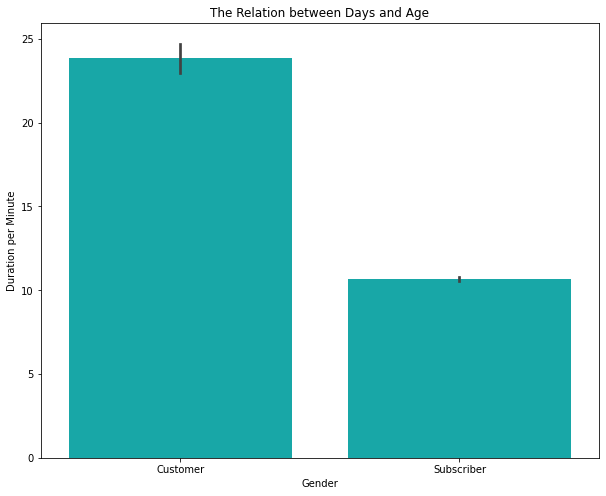

In [24]:
plt.subplots(figsize=(10, 8))
sns.barplot(x='user_type', y='duration_min', data=df,color='c')
plt.ylabel("Duration per Minute")
plt.xlabel("Gender")
plt.title("The Relation between Days and Age");

#### Customers spent time on their trips more than subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that:
1. The younger the age, The longer the trip
2. The longest trips was on Sunday and The shortest trips was on Tuesday


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Customers spent time on their trips more than subscribers

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Research Question 10 (The Relation between Gender, Duration per Minute and Days)

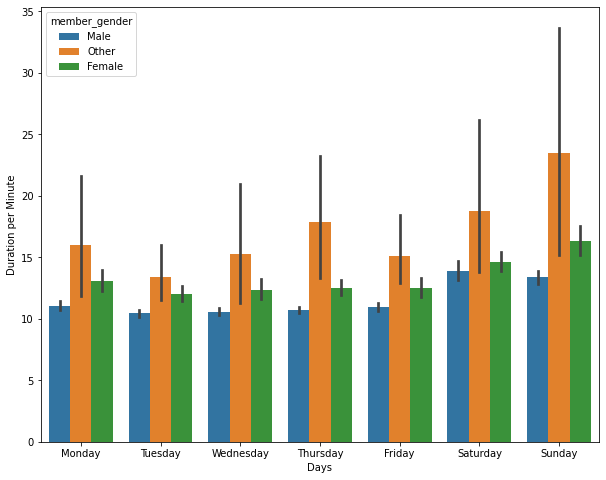

In [27]:
plt.subplots(figsize=(10, 8))
sns.barplot(x='days_ordered', y='duration_min', data=df,hue='member_gender')
plt.ylabel("Duration per Minute")
plt.xlabel("Days");

#### All the days, Female spent more time on their journeys than male


## Research Question 11 (The Relation between Users, Duration per Minute and Days)

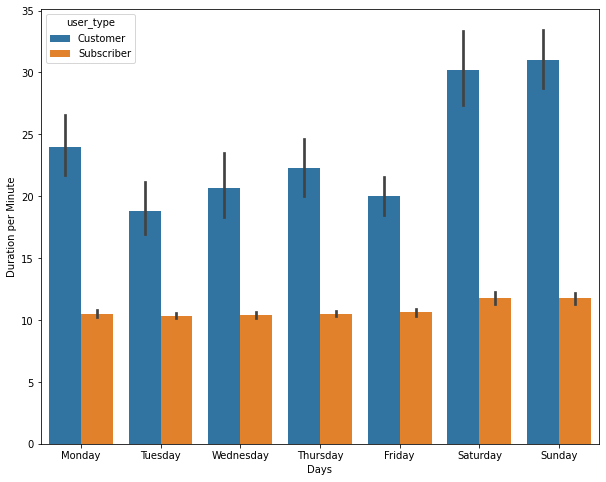

In [28]:
plt.subplots(figsize=(10, 8))
sns.barplot(x='days_ordered', y='duration_min', data=df,hue='user_type')
plt.ylabel("Duration per Minute")
plt.xlabel("Days");

#### All the days,customers spent more time on their journeys than subscribers

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I observed that 
  1. All the days, Female spent more time on their journeys than male
  2. All the days,customers spent more time on their journeys than subscribers
### Were there any interesting or surprising interactions between features?

> NO

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!